<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Evaluating SVM on Multiple Datasets

_Authors: Kiefer Katovich (SF)_

---

In this lab you can explore several datasets with SVM classifiers compared to logistic regression and kNN classifiers. 

Your datasets folder has these four datasets to choose from for the lab:

**Breast cancer**

    ./datasets/breast_cancer_wisconsin

**Spambase**

    ./datasets/spam

**Car evaluation**

    ./datasets/car_evaluation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Load the breast cancer data

- Are there any missing values? Impute or clean if so.
- Select a classification target and predictors.

In [2]:
df = pd.read_csv('../datasets/breast_cancer_wisconsin/breast_cancer.csv', na_values='?')

In [3]:
df.isnull().sum()

Sample_code_number              0
Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

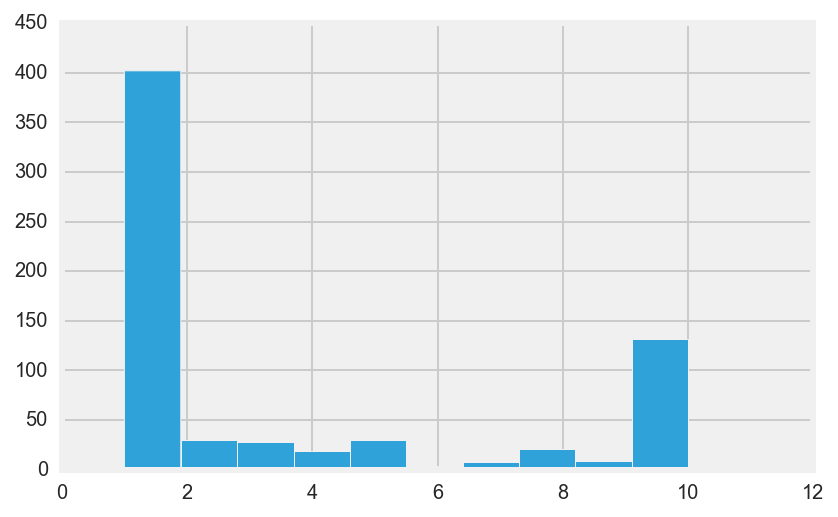

In [4]:
# 16 missing values in Bare_Nuclei
df['Bare_Nuclei'].hist()

In [5]:
# which class are the missing values?
df.ix[df['Bare_Nuclei'].isnull()]['Class'].value_counts()

2    14
4     2
Name: Class, dtype: int64

In [6]:
# I'll drop them
df.dropna(inplace=True)
df.isnull().sum()

Sample_code_number             0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [7]:
df['Class'].unique()

array([2, 4])

In [8]:
X = df.drop(['Sample_code_number', 'Class'], axis = 1)
y = df['Class'].map(lambda x: 1 if x == 4 else 0)

In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xn = ss.fit_transform(X)

### 2. Build an SVM classifier on the data

For details on the SVM classifier, see here:

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

- What's the baseline for the accuracy?
- Initialize and train a linear svm. What's the average accuracy score with a 5-fold cross validation?
- Repeat using a radial basis function (rbf) classifier. Compare the scores. Which one is better?
- Print a confusion matrix and classification report for your best model using training & testing data.

Classification report:

```python
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
```

Confusion matrix:

```python
df_confusion = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
```

In [10]:
#baseline => 65%
y.value_counts() / len(y)

0    0.650073
1    0.349927
Name: Class, dtype: float64

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

lin_model = SVC(kernel='linear')

scores = cross_val_score(lin_model, Xn, y, cv=5)
sm = scores.mean()
ss = scores.std()
print "Average score: {:0.3} +/- {:0.3}".format(sm, ss)

Average score: 0.968 +/- 0.0157


In [12]:
rbf_model = SVC(kernel='rbf')

scores = cross_val_score(rbf_model, Xn, y, cv=5)
sm = scores.mean()
ss = scores.std()
print "Average score: {:0.3} +/- {:0.3}".format(sm, ss)

Average score: 0.965 +/- 0.0203


In [13]:
from sklearn.metrics import classification_report

def print_cm_cr(y_true, y_pred):
    """prints the confusion matrix and the classification report"""
    confusion = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    print confusion
    print
    print classification_report(y_true, y_pred)
    

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xn, y, stratify=y, test_size=0.33)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
print_cm_cr(y_test, y_pred)


Predicted    0   1  All
Actual                 
0          143   4  147
1            2  77   79
All        145  81  226

             precision    recall  f1-score   support

          0       0.99      0.97      0.98       147
          1       0.95      0.97      0.96        79

avg / total       0.97      0.97      0.97       226



#### 2.2 Are there more false positives or false negatives? Is this good or bad?

> Answer:
More false negatives is bad from the point of view of the patient and good from the point of view of the insurance company. Vice versa otherwise.

### 3. Perform the steps above with a different dataset.

Repeat each step.

In [15]:
car = pd.read_csv('../datasets/car_evaluation/car.csv')

In [16]:
car.head(3)

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [17]:
car.buying.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [18]:
car.maint.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [19]:
car.lug_boot.unique()

array(['small', 'med', 'big'], dtype=object)

In [20]:
car.safety.unique()

array(['low', 'med', 'high'], dtype=object)

In [21]:
car.acceptability.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [22]:
# any na?
car.isnull().sum()

buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64

In [23]:
y = car.acceptability.map(lambda x: 1 if x in ['vgood','good'] else 0)

import patsy

X = patsy.dmatrix('~ buying + maint + doors + persons + lug_boot + safety -1',
                  data=car, return_type='dataframe')

ss = StandardScaler()
Xn = ss.fit_transform(X)

In [24]:
y.value_counts() / len(y)
# baseline is 92.2%

0    0.922454
1    0.077546
Name: acceptability, dtype: float64

In [25]:
lin_model = SVC(kernel='linear')

scores = cross_val_score(lin_model, Xn, y, cv=5)
print scores
sm = scores.mean()
ss = scores.std()
print "Average score: {:0.3} +/- {:0.3}".format(sm, ss)

[ 0.98554913  0.96242775  0.90462428  0.66473988  0.875     ]
Average score: 0.878 +/- 0.114


In [26]:
rbf_model = SVC(kernel='rbf')

scores = cross_val_score(rbf_model, Xn, y, cv=5)
print scores
sm = scores.mean()
ss = scores.std()
print "Average score: {:0.3} +/- {:0.3}".format(sm, ss)

[ 0.94219653  0.95086705  0.93930636  0.68786127  0.53488372]
Average score: 0.811 +/- 0.17


In [27]:
X_train, X_test, y_train, y_test = train_test_split(Xn, y, stratify=y, test_size=0.33)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
print_cm_cr(y_test, y_pred)


Predicted    0   1  All
Actual                 
0          523   4  527
1            1  43   44
All        524  47  571

             precision    recall  f1-score   support

          0       1.00      0.99      1.00       527
          1       0.91      0.98      0.95        44

avg / total       0.99      0.99      0.99       571



### 4. Compare SVM, kNN and logistic regression using a dataset.

You should:

- Gridsearch optimal parameters for both (for SVM, just gridsearch C and kernel).
- Cross-validate scores.
- Examine confusion matrices and classification reports.

**Bonus:**

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [28]:
car.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [29]:
X_train, X_test, y_train, y_test = train_test_split(Xn, y, stratify=y, test_size=0.33)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
print_cm_cr(y_test, y_pred)

Predicted    0   1  All
Actual                 
0          522   5  527
1            3  41   44
All        525  46  571

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       527
          1       0.89      0.93      0.91        44

avg / total       0.99      0.99      0.99       571



In [30]:
# gridsearch kNN
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_params = {
    'n_neighbors':range(1,51),
    'weights':['distance','uniform']
}

knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=1)
knn_gs.fit(Xn, y)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/weekiang/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/weekiang/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    9.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [31]:
knn_best = knn_gs.best_estimator_
print knn_gs.best_params_
print knn_gs.best_score_

{'n_neighbors': 50, 'weights': 'uniform'}
0.918402777778


In [32]:
# gridsearch SVM
from sklearn.svm import SVC

svc_params = {
    'C':np.logspace(-3, 2, 10),
    'gamma':np.logspace(-5, 2, 10),
    'kernel':['linear','rbf']
}

svc_gs = GridSearchCV(SVC(), svc_params, cv=3, verbose=1)
svc_gs.fit(Xn, y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   18.0s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf'], 'C': array([  1.00000e-03,   3.59381e-03,   1.29155e-02,   4.64159e-02,
         1.66810e-01,   5.99484e-01,   2.15443e+00,   7.74264e+00,
         2.78256e+01,   1.00000e+02]), 'gamma': array([  1.00000e-05,   5.99484e-05,   3.59381e-04,   2.15443e-03,
         1.29155e-02,   7.74264e-02,   4.64159e-01,   2.78256e+00,
         1.66810e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [33]:
best_svc = svc_gs.best_estimator_
print svc_gs.best_params_
print svc_gs.best_score_

{'kernel': 'linear', 'C': 0.001, 'gamma': 1.0000000000000001e-05}
0.922453703704


In [34]:
from sklearn.linear_model import LogisticRegression

lr_params = {
    'penalty':['l1','l2'],
    'C':np.logspace(-4, 2, 40),
    'solver':['liblinear']
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)
lr_gs.fit(Xn, y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    9.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-04,   1.42510e-04,   2.03092e-04,   2.89427e-04,
         4.12463e-04,   5.87802e-04,   8.37678e-04,   1.19378e-03,
         1.70125e-03,   2.42446e-03,   3.45511e-03,   4.92388e-03,
         7.01704e-03,   1.00000e-02,   1.42510e-02,   2.0...6e+01,
         3.45511e+01,   4.92388e+01,   7.01704e+01,   1.00000e+02]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [35]:
best_lr = lr_gs.best_estimator_
print lr_gs.best_params_
print lr_gs.best_score_

{'penalty': 'l1', 'C': 0.0001, 'solver': 'liblinear'}
0.922453703704
